# **CS372 Assignment 2: Decision Tree**

### Group # 
### **Students Name**

# **Summary**

## **Question 1**

- Download the **Bank Personal Loan Information** data from course Moodle.
- Load Data from CSV file to ['Pandas data frame'](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
- To implement your Decision tree model, you need to:
    - Identify your target feature and descriptive features. In our case, Personal Loan will be our target feature and the rest of the features (descriptive features) will be used to predict Personal loan.

#### Import Libraries

In [94]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

#### Load Bank Personal Loan Information Data

In [95]:
# Load the dataset from the second sheet named "Data"
ds = pd.read_excel("Personal Loan Data_DT.xlsx", sheet_name='Data', header=0, index_col=0)

# Removing Zip Code as it is not useful for prediction
ds.head(10)

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
228,47,23.0,148,94551,2,7.5,Undergrad,0,0,0,1,1,1
230,48,24.0,71,93117,2,1.7,Undergrad,145,0,0,0,0,1
234,62,37.0,58,91320,4,1.7,Undergrad,0,0,0,0,1,0
239,57,32.0,28,95831,3,0.2,Undergrad,0,0,0,0,1,1
241,51,26.0,70,90089,1,1.2,Undergrad,169,0,0,0,0,0
245,41,17.0,78,94025,4,0.8,Undergrad,78,0,0,0,1,0
249,55,29.0,99,92121,2,1.4,Undergrad,264,0,0,0,1,1
253,65,40.0,53,91711,3,2.2,Undergrad,0,0,0,0,0,1
254,47,21.0,138,94583,1,0.0,Undergrad,0,0,0,0,0,0


### **[15 points]** Exploratory Data Analysis
1. **[6 points]** Check for:
    - **[2 points]** ['duplicates'](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html), show the last duplicates. Choose one of the methods we studied in the class to deal with duplicate records (if any) and explain how and why you did that.
    - **[2 points]** ['missing data'](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) in the data frame. Choose one of the methods we studied in the class to deal with missing values, if any. Make sure to explain what you used to fill out missing data. Note that zero is a value not missing data.
    - **[2 points]** Check for Outliers using ['Boxplot'](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html) graphs. Make sure to add necessary labels for each plot. Upon detection, show and explain how you dealt with outliers, justify your choice.
3. **[4 points]** Draw ['scatter plot'](https://seaborn.pydata.org/examples/scatterplot_matrix.html) matrix for all features and comment on the plot.
4. **[5 points]** ['Heatmap correlation'](https://seaborn.pydata.org/generated/seaborn.heatmap.html): Draw a heatmap plot between all independent variables and dependent variables. Comment on your heatmap (i.e. the strength and the direction of the correlation between features).

#### **1.** Check Duplicate Data

In [96]:
# check duplicate data and show the records
duplicates = ds[ds.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


#### Handle Duplicate Data

In [97]:
ds.drop_duplicates(inplace=True) # throw away duplicate data

#### **Explain how you dealt with duplicates**

Exmplain how you dealt them, why, and justify your choice here.

#### Check Missing Data

In [98]:
# Remove ZIP codes as there are no duplicate data, we remove ZIP Code as it will not help with the prediction
ds = ds.drop(columns=['ZIP Code'])

# check missing data and show the records
# Delete all Experience that are negative and predict these as well
ds['Experience'] = ds['Experience'].apply(lambda x: np.nan if x < 0 else x)

missing_data = [] # This variable is used to store the IDs with missing values
for i in range(len(ds)):
    for j in ds.columns:
        if pd.isnull(ds.loc[ds.index[i],j]):
            print(f"Index: '{ds.index[i]}' Column: '{j}' is blank")
            missing_data.append(ds.index[i])

Index: '400' Column: 'Experience' is blank
Index: '525' Column: 'Experience' is blank
Index: '598' Column: 'Experience' is blank
Index: '671' Column: 'Experience' is blank
Index: '794' Column: 'Experience' is blank
Index: '910' Column: 'Experience' is blank
Index: '1429' Column: 'Experience' is blank
Index: '1906' Column: 'Experience' is blank
Index: '2431' Column: 'Experience' is blank
Index: '3158' Column: 'Experience' is blank
Index: '3293' Column: 'Experience' is blank
Index: '3426' Column: 'Experience' is blank
Index: '3825' Column: 'Experience' is blank
Index: '3888' Column: 'Experience' is blank
Index: '4016' Column: 'Experience' is blank
Index: '4117' Column: 'Experience' is blank
Index: '4286' Column: 'Experience' is blank
Index: '227' Column: 'Experience' is blank
Index: '537' Column: 'Experience' is blank
Index: '584' Column: 'Experience' is blank
Index: '687' Column: 'Experience' is blank
Index: '1020' Column: 'Experience' is blank
Index: '1174' Column: 'Experience' is blan

#### Handle Missing Data

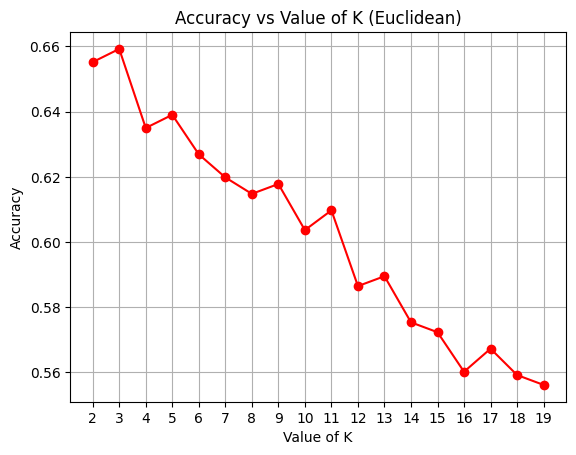

highest Accuracy (Euclidean): 0.66, K: 3
      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
ID                                                                  
228  47.0        23.0   148.0     2.0    7.5        1.0       0.0   
230  48.0        24.0    71.0     2.0    1.7        1.0     145.0   
234  62.0        37.0    58.0     4.0    1.7        1.0       0.0   
239  57.0        32.0    28.0     3.0    0.2        1.0       0.0   
241  51.0        26.0    70.0     1.0    1.2        1.0     169.0   
..    ...         ...     ...     ...    ...        ...       ...   
214  57.0        33.0   155.0     1.0    7.4        1.0       0.0   
216  38.0        14.0    92.0     2.0    0.0        1.0     249.0   
217  27.0         3.0   125.0     2.0    0.6        1.0       0.0   
218  39.0        14.0    74.0     3.0    3.0        1.0       0.0   
221  32.0         6.0    25.0     2.0    0.3        1.0       0.0   

     Personal Loan  Securities Account  CD Account  Online  C

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,
228,47.0,23.0,148.0,2.0,7.5,1.0,0.0,0.0,0.0,1.0,1.0,1.0
230,48.0,24.0,71.0,2.0,1.7,1.0,145.0,0.0,0.0,0.0,0.0,1.0
234,62.0,37.0,58.0,4.0,1.7,1.0,0.0,0.0,0.0,0.0,1.0,0.0
239,57.0,32.0,28.0,3.0,0.2,1.0,0.0,0.0,0.0,0.0,1.0,1.0
241,51.0,26.0,70.0,1.0,1.2,1.0,169.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# handle the missing data
# Prepare dataset for KNNImputation, this will use KNN to fill in the missing categorical values
df = ds.copy()

# Encode all the education 
education_encode = {'Undergrad' : 1, 'Graduate' : 2, 'Professional' : 3}
df['Education'] = df['Education'].map(education_encode) 
#df is the encoded dataset with the missing values

# Removing features that might not be useful to predict experience and education
# df_dropped will be used to calculate the missing values
df_dropped = df.drop(['Securities Account', 'CD Account', 'Personal Loan', 'Online', 'CreditCard'], axis=1)

# creating a copy of the dataframe to be manipulated by KNN
knn_df = df_dropped.copy() 

# drop empty values, this will be used for the knn
knn_df.dropna(inplace=True)

# Split the dataset 80/20
x = knn_df.drop(['Education'], axis=1)
y = knn_df['Education']

x_scaled = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, train_size=0.8, random_state=0, stratify=y)

high_acc = 0.0
nh = 0
accuracies = []

# find the best value of K for KNNImpute using KNN on a validation set
for n in range(2,20):
    knn1 = KNeighborsClassifier(n_neighbors=n, weights='uniform', algorithm='auto', metric='euclidean')
    knn1.fit(x_train, y_train)
    x_pre = knn1.predict(x_test)

    accuracy = accuracy_score(y_test, x_pre)
    accuracies.append(accuracy)
    # print(f"Accuracy: {accuracy:.2f}, n_neighbour: {n}")
    if accuracy > high_acc:
        high_acc = accuracy
        nh = n
        
# Print out accuracy chart to k value
plt.figure()
plt.plot(range(2,20), accuracies, marker='o',  linestyle='-', color='r')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Value of K (Euclidean)')
plt.xticks(range(2,20))
plt.grid(True)
plt.savefig('AvK(Euclidean).jpg', format='jpg')
plt.show()

print(f"highest Accuracy (Euclidean): {high_acc:.2f}, K: {nh}")

# Initialize and set N value, dont use 1 to prevent over-fitting. 
knn_imputation = KNNImputer(n_neighbors=nh)

# Execute the KNN Imputation for the dataset
garbage_out = knn_imputation.fit_transform(df_dropped) #garbage_out is the encoded dataset with the categorised values

# Convert the new dataset into a DataFrame
corrected_df = pd.DataFrame(garbage_out, columns=df_dropped.columns, index=df_dropped.index) 

for column in df_dropped.columns:
    df[column] = corrected_df[column]
print(df)

corrected_df = df.copy()

#### **Explain how you dealt with missing data**

Explain how you dealt them, why, and justify your choice here.



#### Draw Box Plot

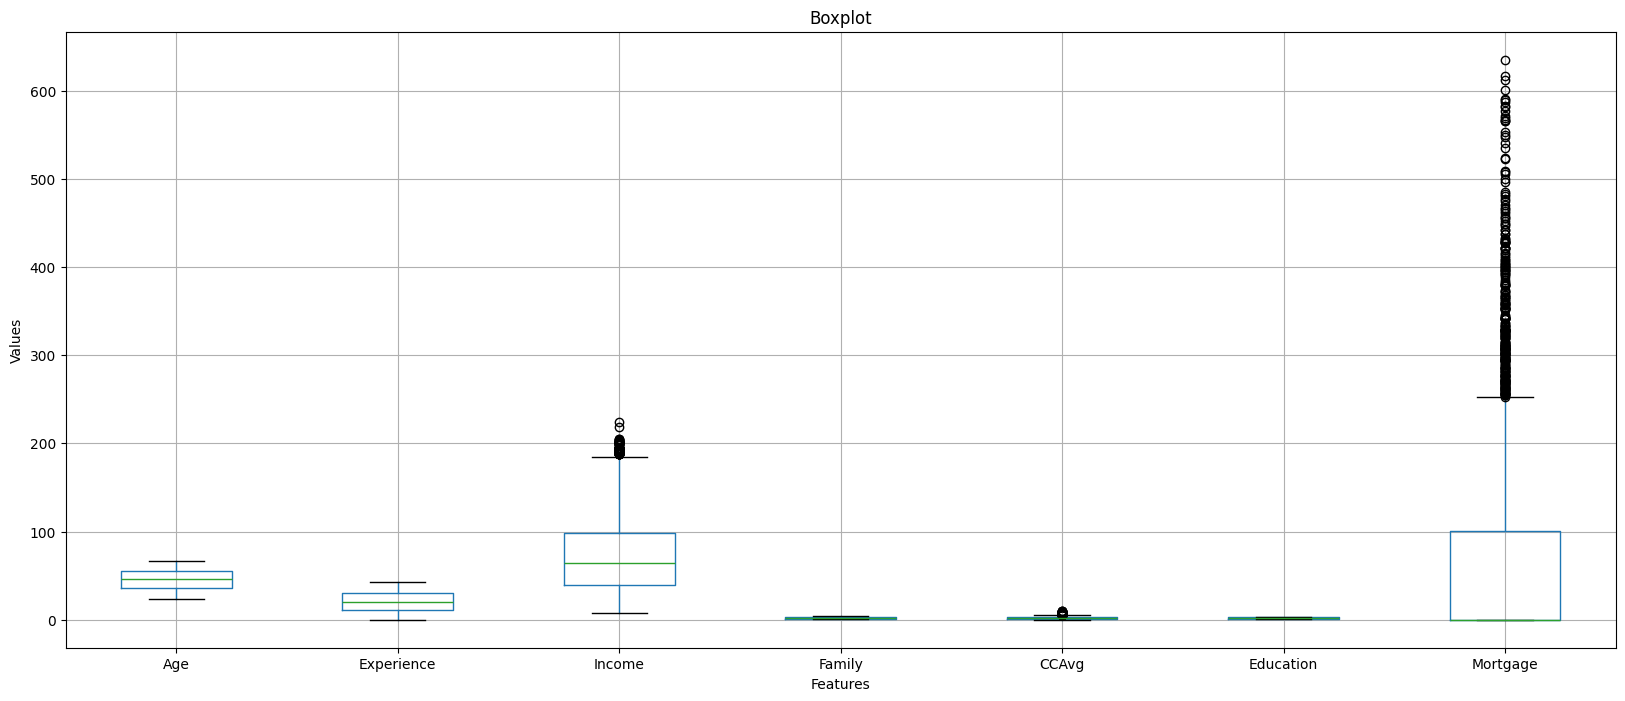

In [100]:
#Processing unuseful data out (binary)
boxplot_data = corrected_df.drop(['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'], axis=1)

plt.figure(figsize=(20, 8))
boxplot_data.boxplot()
plt.title('Boxplot')
plt.xlabel('Features')
plt.ylabel('Values')
plt.savefig('boxplot.jpg', format='jpg')
plt.show()

#### **Explain how Box Plot consider outliers in the dataset**

Add comments here

#### **Analyze and comment on the box plot**

Add comments here

#### **3.** Plot Scatter Matrix

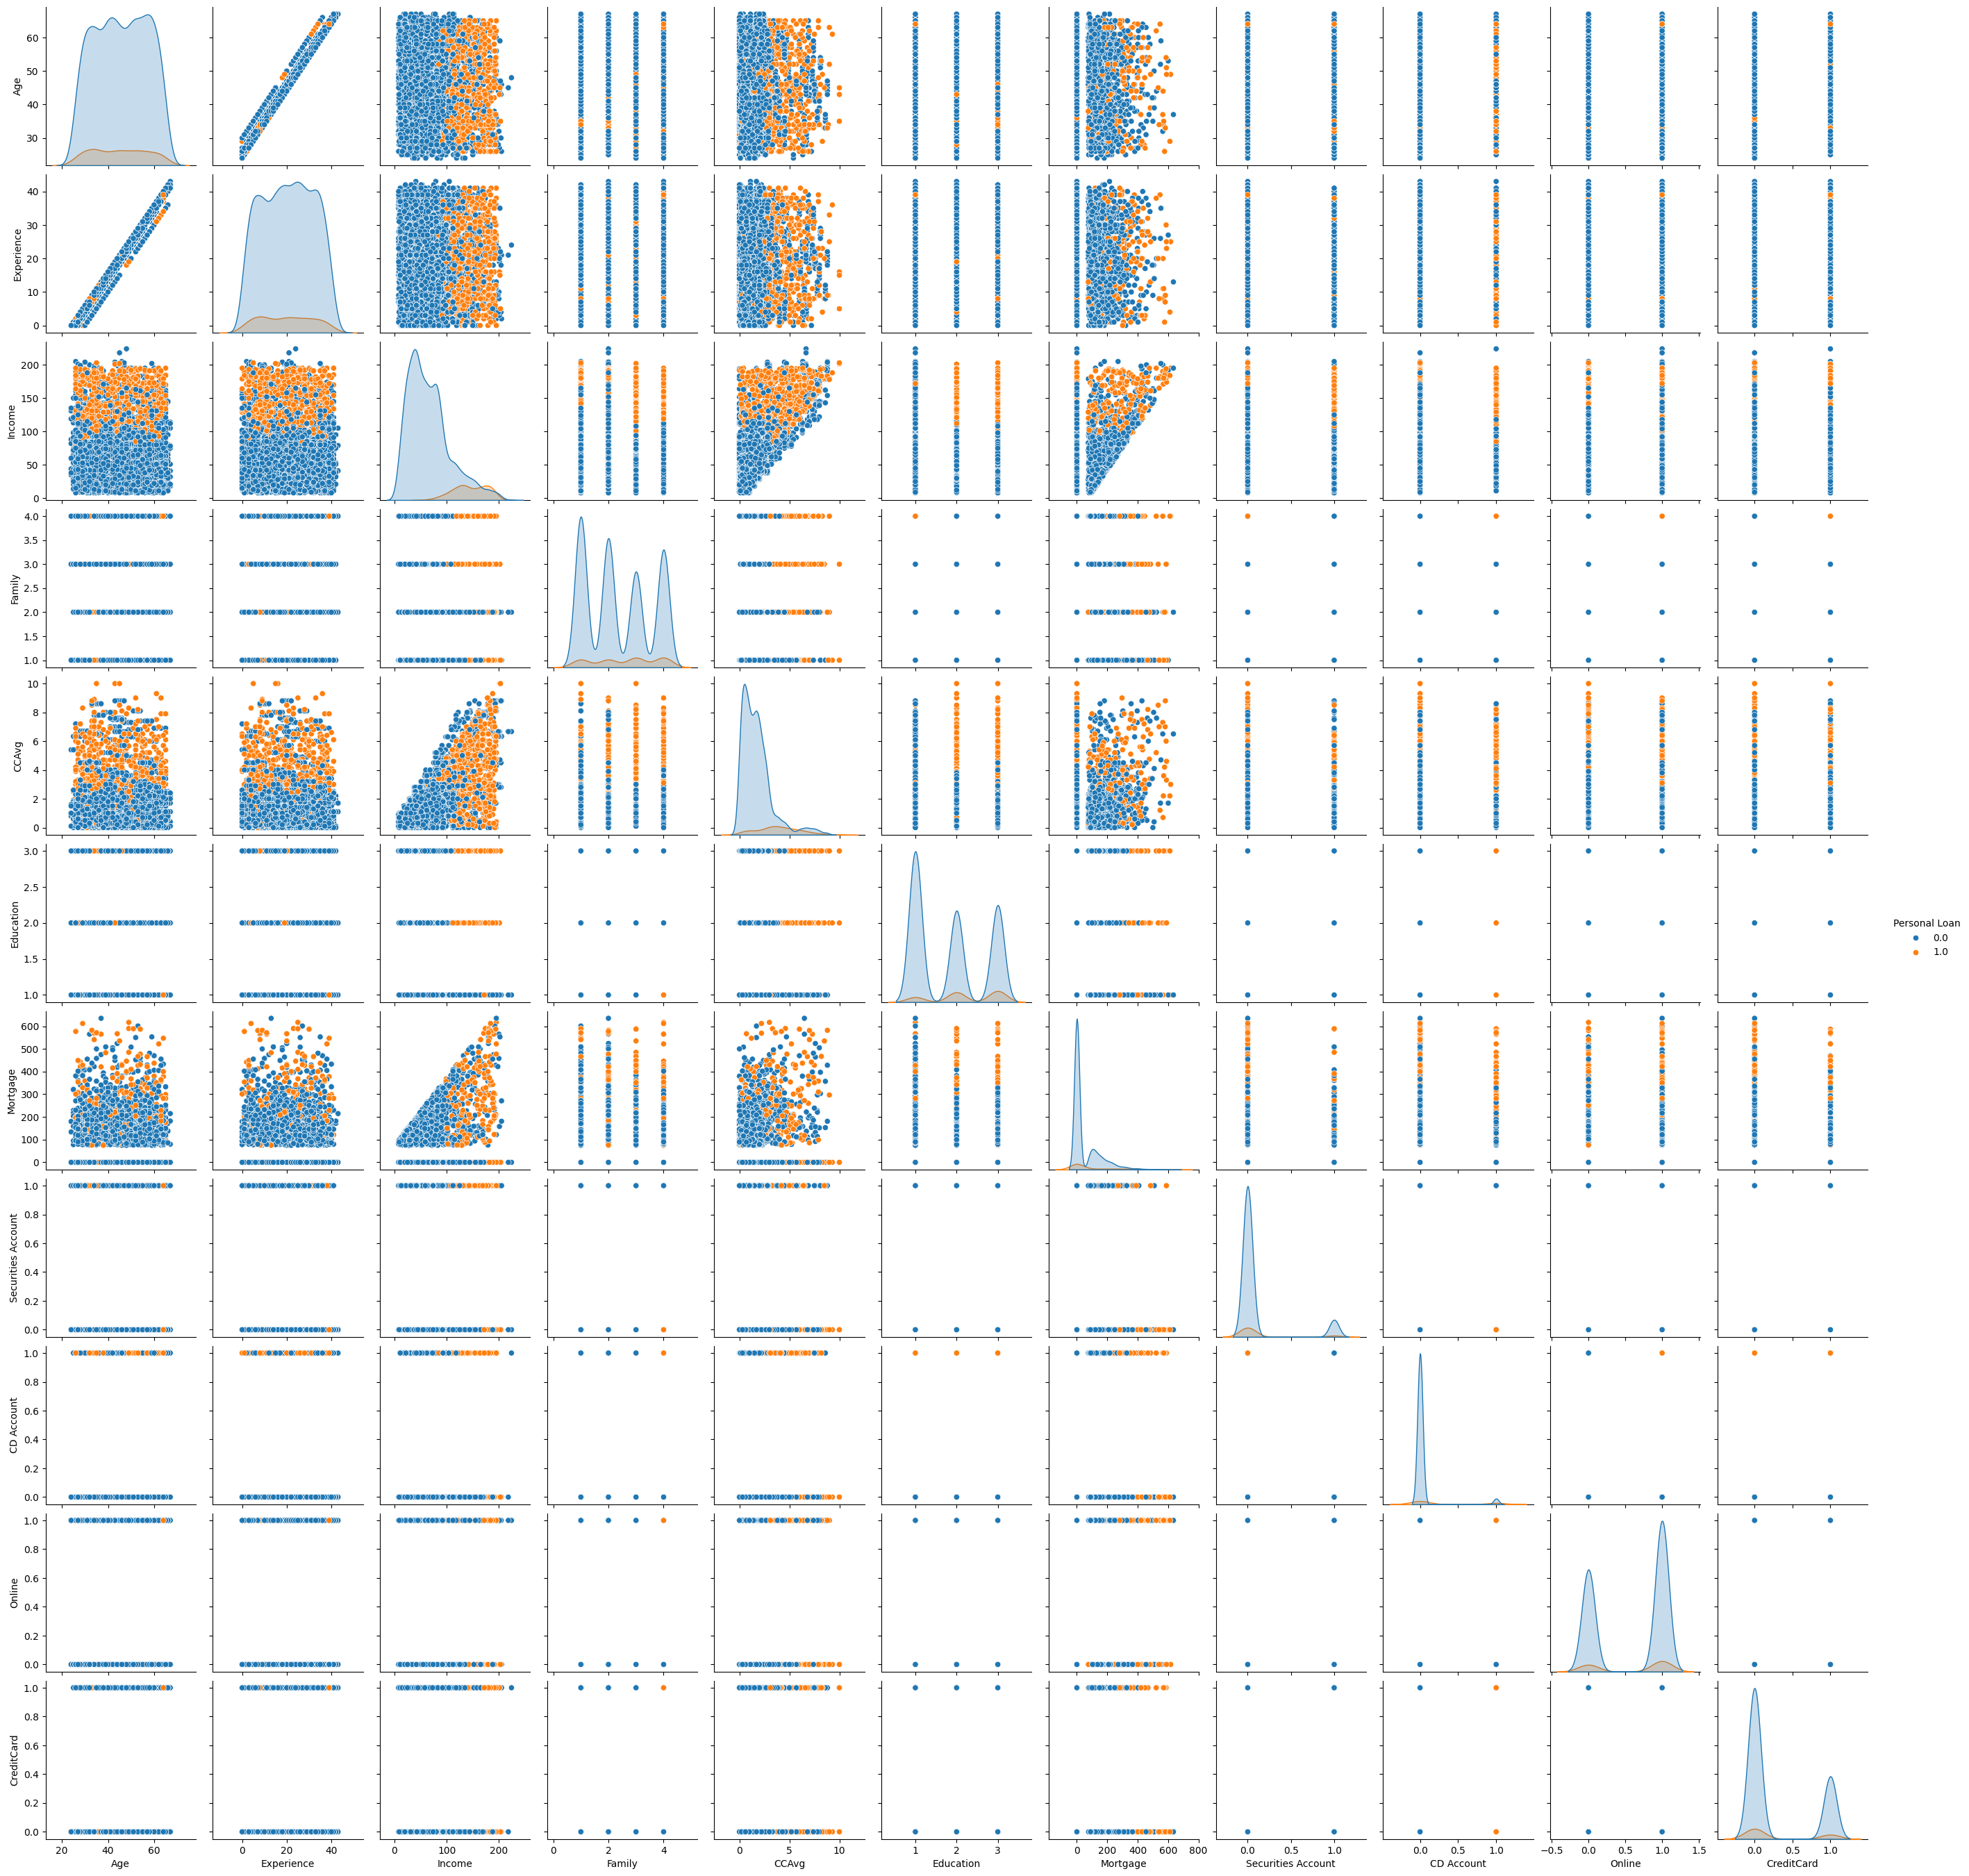

In [101]:
# Generate a scatterplot matrix
sns.pairplot(corrected_df, hue = 'Personal Loan')
plt.savefig('scatterplot_matrix.jpg', format='jpg')
plt.show()

#### **Analyze and comment on the scatter matrix plot**

Add comments here

#### **4.** Plot Heatmap Correlation

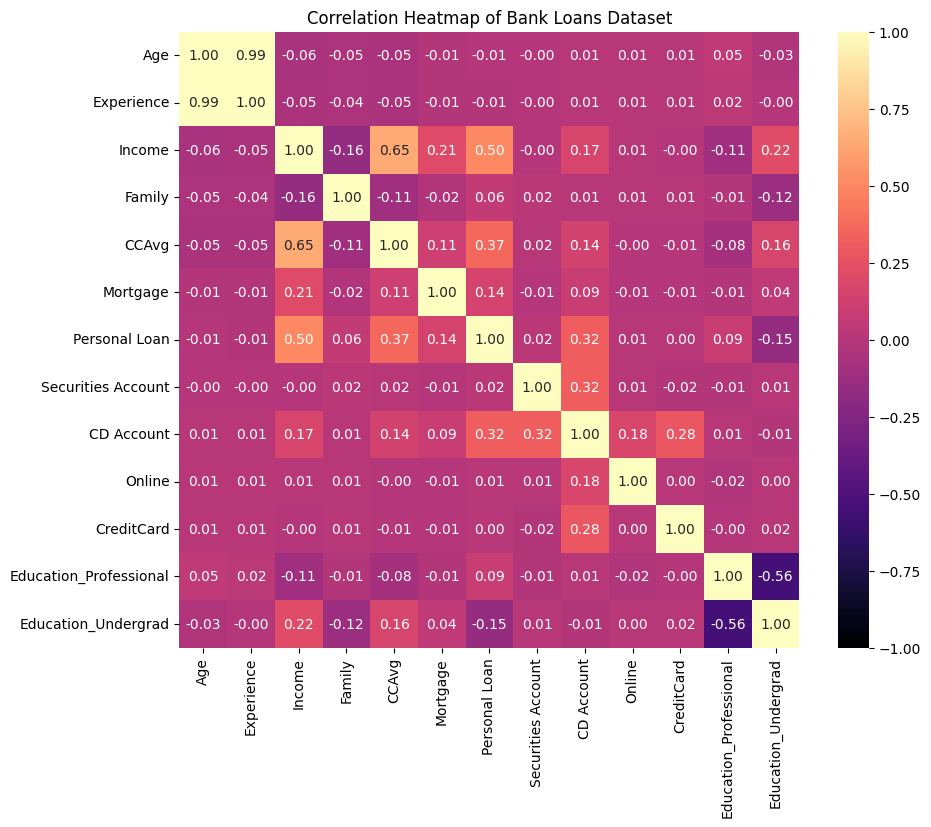

In [102]:
encoded_ds = pd.get_dummies(ds, drop_first=True)
correlation_matrix = encoded_ds.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Bank Loans Dataset')
plt.show()

#### **Analyze and comment on the heatmap correlation plot**

Add comments here

### Decision Tree **[33 points]**

1. **[10 points]** To use categorical data with scikit-learn in Decision Trees, we have to use the One-Hot Encoding trick to convert categorical columns into multiple columns of binary values. There are two popular methods that you could use for this purpose, namely:
    - [ColumnTransformer()](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) (from scikit-learn)
    - [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) (from pandas)
    - **Note that** One-Hot Encoding converts a column with more than 2 categories, and hence, we don’t need to process categorical features with only two categories.
2. **[3 points]** [Split your dataset 80/20](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split).  Train the model on the 80% fraction and then evaluate the accuracy on the 20% fraction. Make sure that if I run the algorithm again, I will get the same split and also the proportion of the classes are preserved in the split. Shuffle the data before split.
3. **[10 points]** Build and Compare two Decision Trees, [based on](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier):
    - **[5 points]** Gini Impurity.
    - **[5 points]** Entropy.
4. **[10 points]** [Visualize](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) the fully grown Decision Trees you built (tree graph). (5 points for each tree)

#### **1.** One-Hot Encoding: convert categorical columns into multiple columns of binary values

In [103]:
# Identify the categorical columns
categorical_cols = ['Family', 'Education', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

# Apply One-Hot Encoding using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)


#### **2.** Split your data 80/20 (Shuffle and Split)

In [104]:
# Transform the data
X = ds.drop('Personal Loan', axis=1)
y = ds['Personal Loan']
X_transformed = preprocessor.fit_transform(X)

# Convert back to a DataFrame for easier manipulation
X_transformed_df = pd.DataFrame(X_transformed, columns=preprocessor.get_feature_names_out())

# Split the dataset into 80/20
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42, stratify=y)


#### **3.** Build Decision Trees: Gini Impurity

Accuracy of Decision Tree (Gini): 0.9750


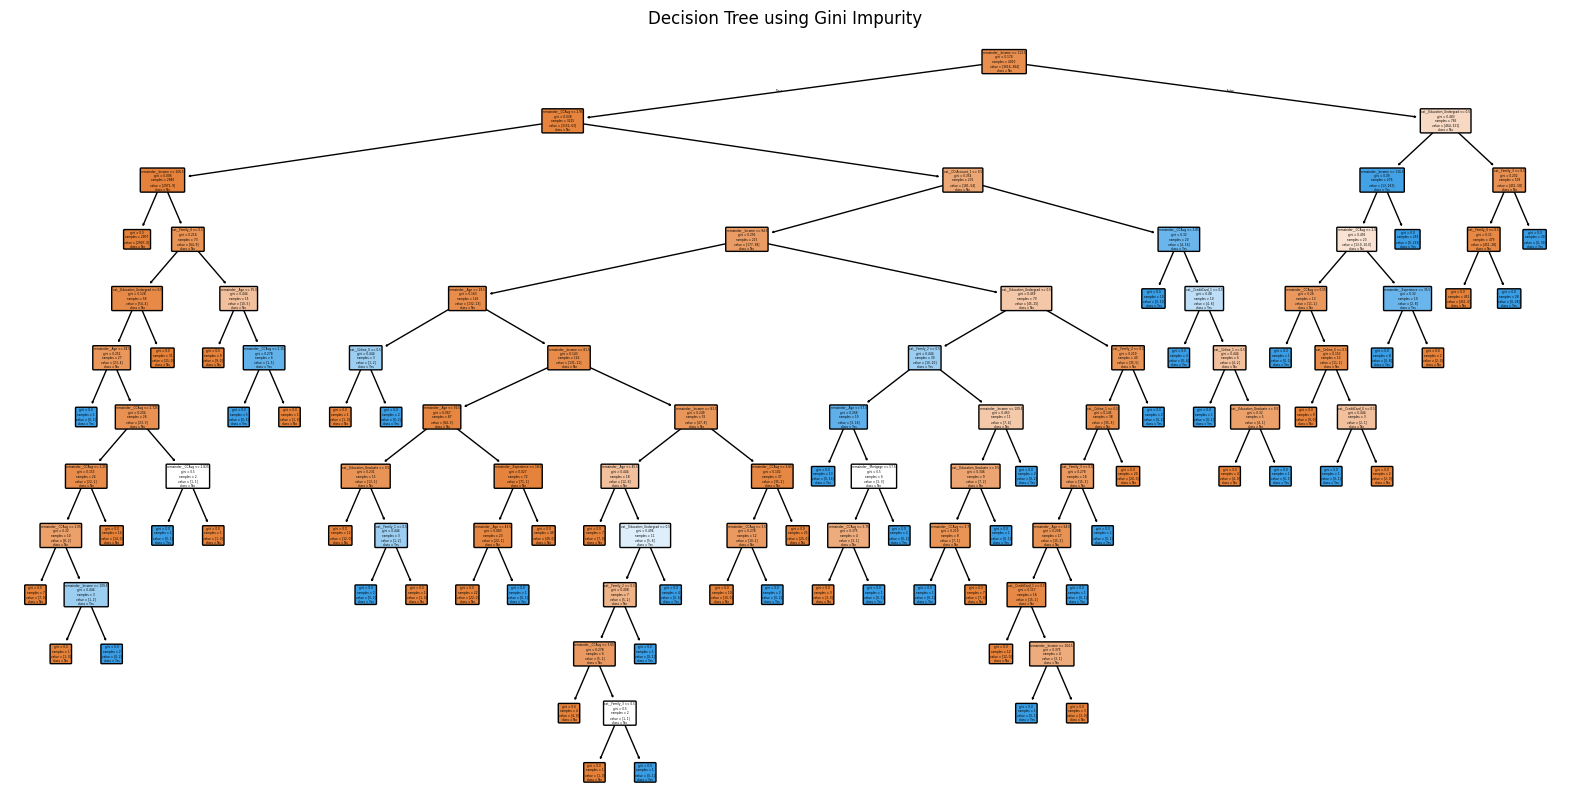

In [105]:
# Build Decision Tree using Gini Impurity
gini_tree = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_tree.fit(X_train, y_train)

# Predict using the Gini Tree
y_pred_gini = gini_tree.predict(X_test)

# Calculate accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print(f"Accuracy of Decision Tree (Gini): {accuracy_gini:.4f}")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(gini_tree, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=['No', 'Yes'], rounded=True)
plt.title("Decision Tree using Gini Impurity")
plt.show()


#### Build Decision Trees: Entropy

Accuracy of Decision Tree (Entropy): 0.9750


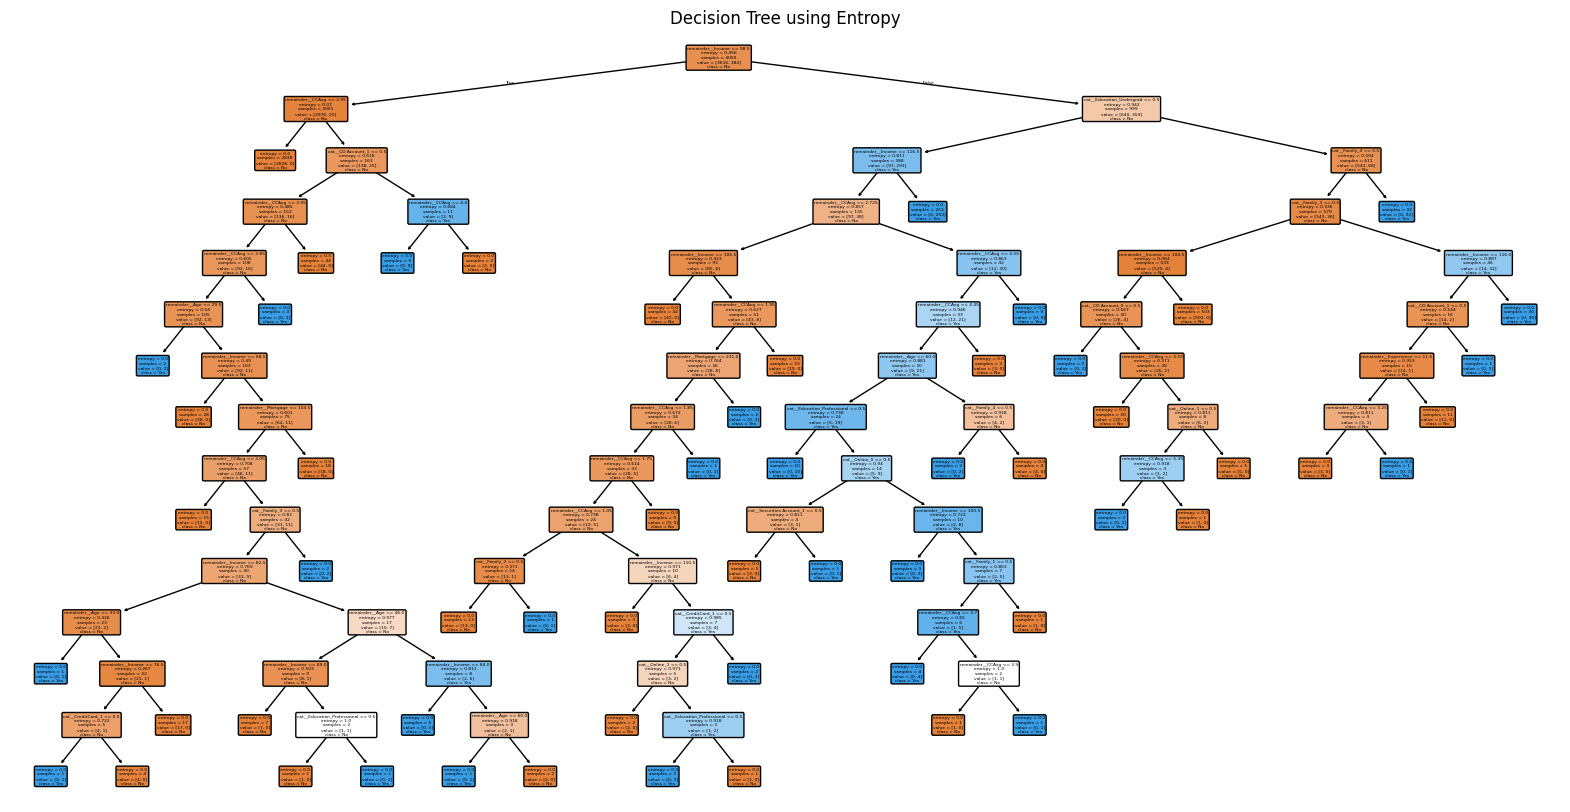

In [106]:
# Build Decision Tree using Entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_tree.fit(X_train, y_train)

# Predict using the Entropy Tree
y_pred_entropy = entropy_tree.predict(X_test)

# Calculate accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"Accuracy of Decision Tree (Entropy): {accuracy_entropy:.4f}")

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
tree.plot_tree(entropy_tree, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=['No', 'Yes'], rounded=True)
plt.title("Decision Tree using Entropy")
plt.show()


#### **Analyze and compare two Decision Trees**

Analyze and compare two Decision Tress

#### **4.** Visualize the fully grown Decision Trees (Gini Impurity)

#### Visualize the fully grown Decision Trees (Entropy)

### Model Evaluation **[10 points]**
1. **[6 points]** To evaluate the performance of your classifier use:
     - **[2 points]** execution time.
     - **[2 points]** Accuracy.
     - **[2 points]** confusion matrix.
2. **[2 points]** Analyze, explain, and comment on your result.
3. **[2 points]** How does the Number of training sample affect performance (accuracy, time, etc.)? Explain and draw a graph.

#### **1.** Evaluate the performance : Execution Time

#### **2.** Evaluate the performance : Accuracy

#### **3.** Evaluate the performance : Confusion Matrix

**2. Analyze, explain, and comment on your result.**

#### **3.**How does the Number of training sample affect performance (accuracy, time, etc.)? Explain and draw a graph.

#### **Analyze and Explain result of the graphs**

Explain on your finding

### Tree Prunning **[33 points]**
1. Implement the following pruning methods for both Decision Trees (Gini and Entropy):
    - **[5 points]** maximum depth
          - What is the best depth limit to use for this data? Use 5-fold cross validation for selection.
    - **[5 points]** minimum number of samples. Use 5-fold cross validation to decide.
    - **[5 points]** [cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)
2. **[10 points]** Compare the overall accuracy of Decision Trees using different pruning methods in terms of accuracy and time. Next, make sure to compare that with a fully grown tree.
3. **[8 points]** Plot and interpret all pruned trees.

#### **1.** [Pruning] Maximum depth : Gini 

#### [Pruning] Maximum depth : Entropy 

#### **Comments and explain the best depth limit**

Comments and explain the best depth limit to use for this data based on pruned Decision Trees

#### [Pruning] Minimum number of samples : Gini 

#### [Pruning] Minimum number of samples : Entropy 

#### [Pruning] Cost complexity pruning : Gini

#### [Pruning] Cost complexity pruning : Entropy 

#### **2.** Compare accuracy and time of Decision Trees using different pruning methods

#### **Compare the overall accuracy of Decision Trees using different pruning methods in terms of accuracy and time.**

Add comments here

#### **Compare pruned trees with a fully grown trees.**

Add comments here

#### **3.** Plot and interpret all pruned trees